<a href="https://colab.research.google.com/github/ram30098singh/Deep-learning-and-NLP-/blob/main/Retail_Data_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Retail Data Analytics

In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from statsmodels.graphics.tsaplots import acf, pacf, plot_acf, plot_pacf
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras.layers import LSTM

In [159]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [160]:
df1 = pd.read_csv('https://raw.githubusercontent.com/ram30098singh/Dataset/main/Features%20data%20set.csv', delimiter=',')
df1.dataframeName = 'Features data set.csv'
df1.shape
df1.head()

(8190, 12)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


**DataSet consist 8190 rows and 12 columns**

1. Store - the store number
2. Temperature - average temperature in the region
3. Fuel_Price - cost of fuel in the region
4. MarkDown1-5 - anonymized data related to promotional markdowns
5. CPI - the consumer price index
6. Unemployment - the unemployment rate
7. IsHoliday - whether the week is a special holiday week

In [161]:
df2 = pd.read_csv('https://raw.githubusercontent.com/ram30098singh/Dataset/main/sales%20data-set.csv', delimiter=',')
df2.dataframeName = 'Sales data set.csv'
df2.shape
df2.head()

(421570, 5)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


**DataSet consist 421570 rows and 5 columns**

1. Dept - the department number
2. Weekly_Sales - sales for the given department in the given store
3. IsHoliday - whether the week is a special holiday week

In [162]:
df3 = pd.read_csv('https://raw.githubusercontent.com/ram30098singh/Dataset/main/stores%20data-set.csv', delimiter=',')
df3.dataframeName = 'Stores data set.csv'
df3.shape
df3.head()

(45, 3)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


First of all, we need to merge these three DataSets into one using by pandas.DataFrame.merge()

In [163]:
df = df1.merge(df3, on = 'Store')
df = df2.merge(df, on = ['Store','Date', 'IsHoliday'])
df.shape
df.head()

(421570, 16)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,05/02/2010,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,05/02/2010,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,05/02/2010,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,05/02/2010,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [165]:
df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

In [166]:
df=df.fillna(0)

We will transform Date columns into DateTime format. Also type of Store must be categorical

In [167]:
df['Date'] = pd.to_datetime(df['Date'])
df['Type'] = df['Type'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     421570 non-null  float64       
 8   MarkDown2     421570 non-null  float64       
 9   MarkDown3     421570 non-null  float64       
 10  MarkDown4     421570 non-null  float64       
 11  MarkDown5     421570 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  category      
 15  Size          421

<ipython-input-167-87dc84d065de>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


Since stores and their departments belong to different categories, have different sizes, different quantities and assortments of goods and are located in different parts of the city, it will be a mistake to fit the neural network on all records. With the same input data departments located in different parts of the city will have different sales. In other words, the information for each department has its own variance. Therefore, for the analysis, it is necessary to identify departments and make an analysis separately for each of them.

In [168]:
df.groupby(['Store', 'Dept','Date']).sum()

<ipython-input-168-13091dfd7a4f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Store', 'Dept','Date']).sum()


Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
Store Dept Date                                                           
1     1    2010-01-10      20094.19          0        71.89       2.603   
           2010-02-04      57258.43          0        62.27       2.719   
           2010-02-07      16333.14          0        80.91       2.669   
           2010-02-19      41595.55          0        39.93       2.514   
           2010-02-26      19403.54          0        46.63       2.561   
...                             ...        ...          ...         ...   
45    98   2012-10-08        727.49          0        78.65       3.722   
           2012-10-19        760.01          0        56.47       3.969   
           2012-10-26       1076.80          0        58.85       3.882   
           2012-11-05        893.60          0        61.24       3.889   
           2012-12-10       1061.02          0        54.47       4.000   

                       MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
Store Dept Date                                                                
1     1    2010-01-10       0.00       0.00       0.00       0.00       0.00   
           2010-02-04       0.00       0.00       0.00       0.00       0.00   
           2010-02-07       0.00       0.00       0.00       0.00       0.00   
           2010-02-19       0.00       0.00       0.00       0.00       0.00   
           2010-02-26       0.00       0.00       0.00       0.00       0.00   
...                          ...        ...        ...        ...        ...   
45    98   2012-10-08   17868.84      50.60      57.66    2593.93    1890.59   
           2012-10-19    2004.02       0.00       3.18     437.73    1537.49   
           2012-10-26    4018.91      58.08     100.00     211.94     858.33   
           2012-11-05   12611.18       0.00      21.36    1667.39    2313.12   
           2012-12-10    1956.28       0.00       7.89     599.32    3990.54   

                              CPI  Unemployment    Size  
Store Dept Date                                          
1     1    2010-01-10  211.671989         7.838  151315  
           2010-02-04  210.820450         7.808  151315  
           2010-02-07  211.223533         7.787  151315  
           2010-02-19  211.289143         8.106  151315  
           2010-02-26  211.319643         8.106  151315  
...                           ...           ...     ...  
45    98   2012-10-08  191.162613         8.684  118221  
           2012-10-19  192.330854         8.667  118221  
           2012-10-26  192.308899         8.667  118221  
           2012-11-05  190.976417         8.567  118221  
           2012-12-10  192.327265         8.667  118221  

[421570 rows x 12 columns]

Calculate number of rows for each department:

In [169]:
df[['Store', 'Dept']].value_counts()

Store  Dept
1      1       143
40     55      143
       59      143
24     49      143
       50      143
              ... 
21     50        1
42     34        1
36     36        1
25     96        1
23     99        1
Length: 3331, dtype: int64

As we can see most of departments have 143 rows. Let's make analysis for one of them.

In [170]:
St = 24
Dt = 50

Let's create DataSet for Store: St and Department: Dt

In [171]:
df_d = df[(df['Store']==St) & (df['Dept']==Dt)]
df_d

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
226912,24,50,2010-05-02,2030.0,False,22.43,2.954,0.00,0.00,0.00,0.00,0.00,131.527903,8.326,A,203819
226985,24,50,2010-12-02,1535.0,True,25.94,2.940,0.00,0.00,0.00,0.00,0.00,131.586613,8.326,A,203819
227059,24,50,2010-02-19,1570.0,False,31.05,2.909,0.00,0.00,0.00,0.00,0.00,131.637000,8.326,A,203819
227130,24,50,2010-02-26,1350.0,False,33.98,2.910,0.00,0.00,0.00,0.00,0.00,131.686000,8.326,A,203819
227201,24,50,2010-05-03,2700.0,False,36.73,2.919,0.00,0.00,0.00,0.00,0.00,131.735000,8.326,A,203819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236783,24,50,2012-09-28,1035.0,False,58.86,4.158,11941.13,15.28,21.76,984.11,7013.13,138.739500,8.953,A,203819
236854,24,50,2012-05-10,1005.0,False,60.35,4.151,10349.00,0.00,16.05,5824.86,2770.76,138.825600,8.693,A,203819
236926,24,50,2012-12-10,1196.5,False,51.64,4.186,5138.51,0.00,141.88,407.81,3284.69,138.911700,8.693,A,203819
236999,24,50,2012-10-19,1151.0,False,52.59,4.153,3446.70,0.00,101.00,111.46,5963.01,138.833613,8.693,A,203819


<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, *, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

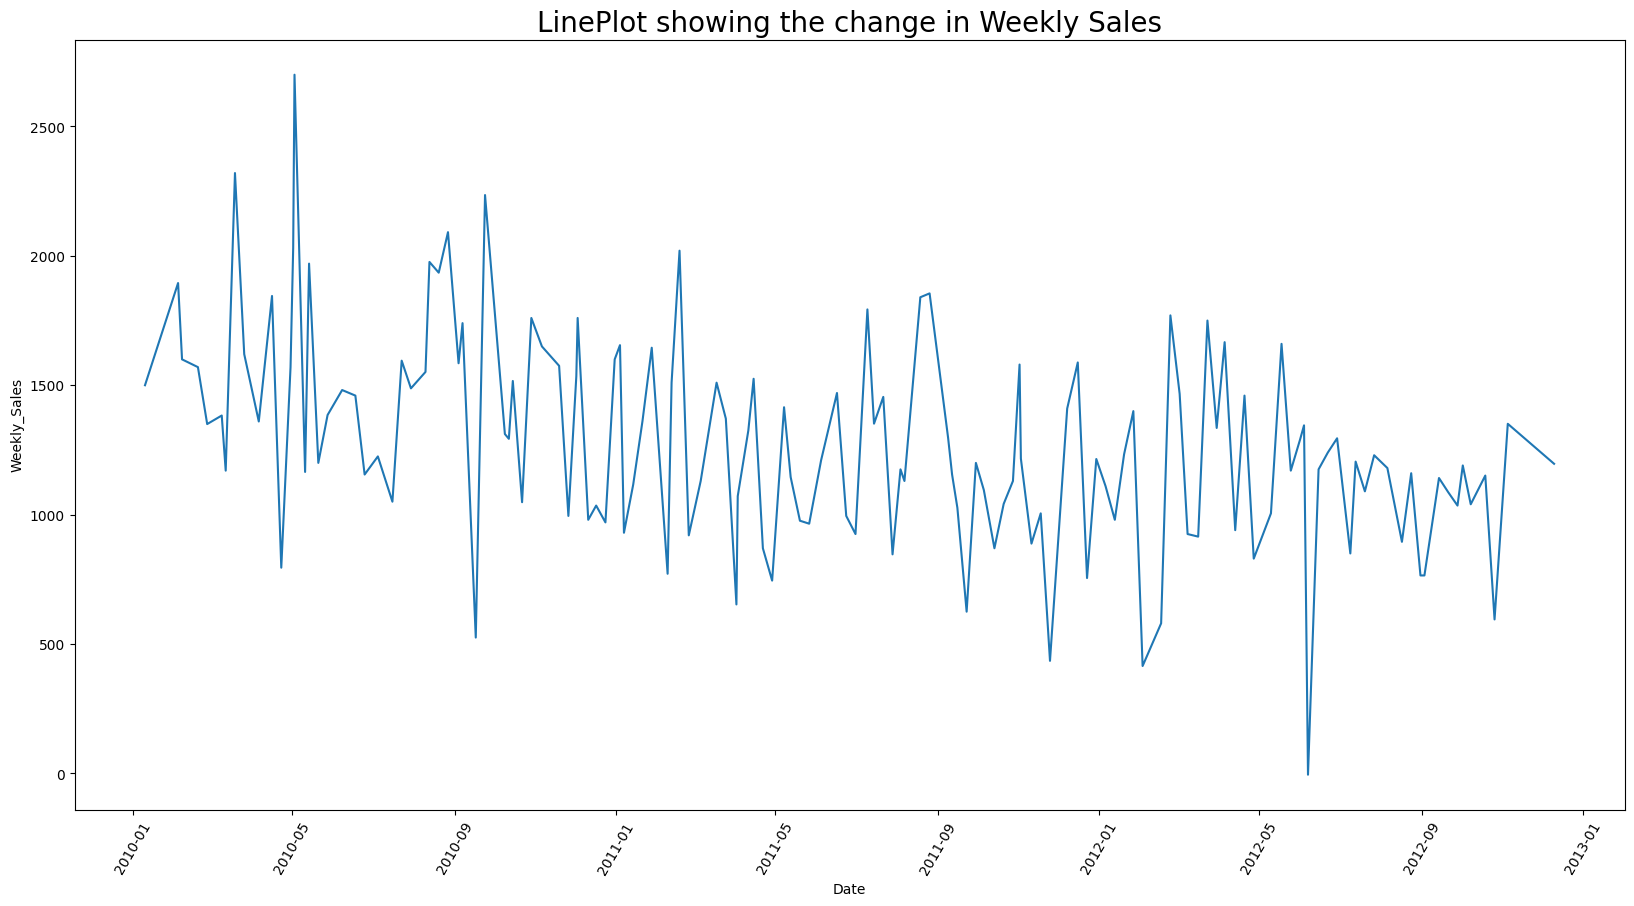

In [172]:
plt.figure
_ = plt.subplots(figsize = (20,10))
_ = plt.xticks(rotation = 60)
_ = sns.lineplot(data = df_d, x = 'Date',y = 'Weekly_Sales', )
_ = plt.title('LinePlot showing the change in Weekly Sales', fontsize=20)
plt.show()

### Let's visualize how sales change during the holidays

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, *, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

<ipython-input-173-f1d3efd9e14c>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  _ = sns.lineplot(data = df_d, x = 'Date',y = 'Weekly_Sales', hue = 'IsHoliday',style = 'IsHoliday', markers = True, ci = 68)


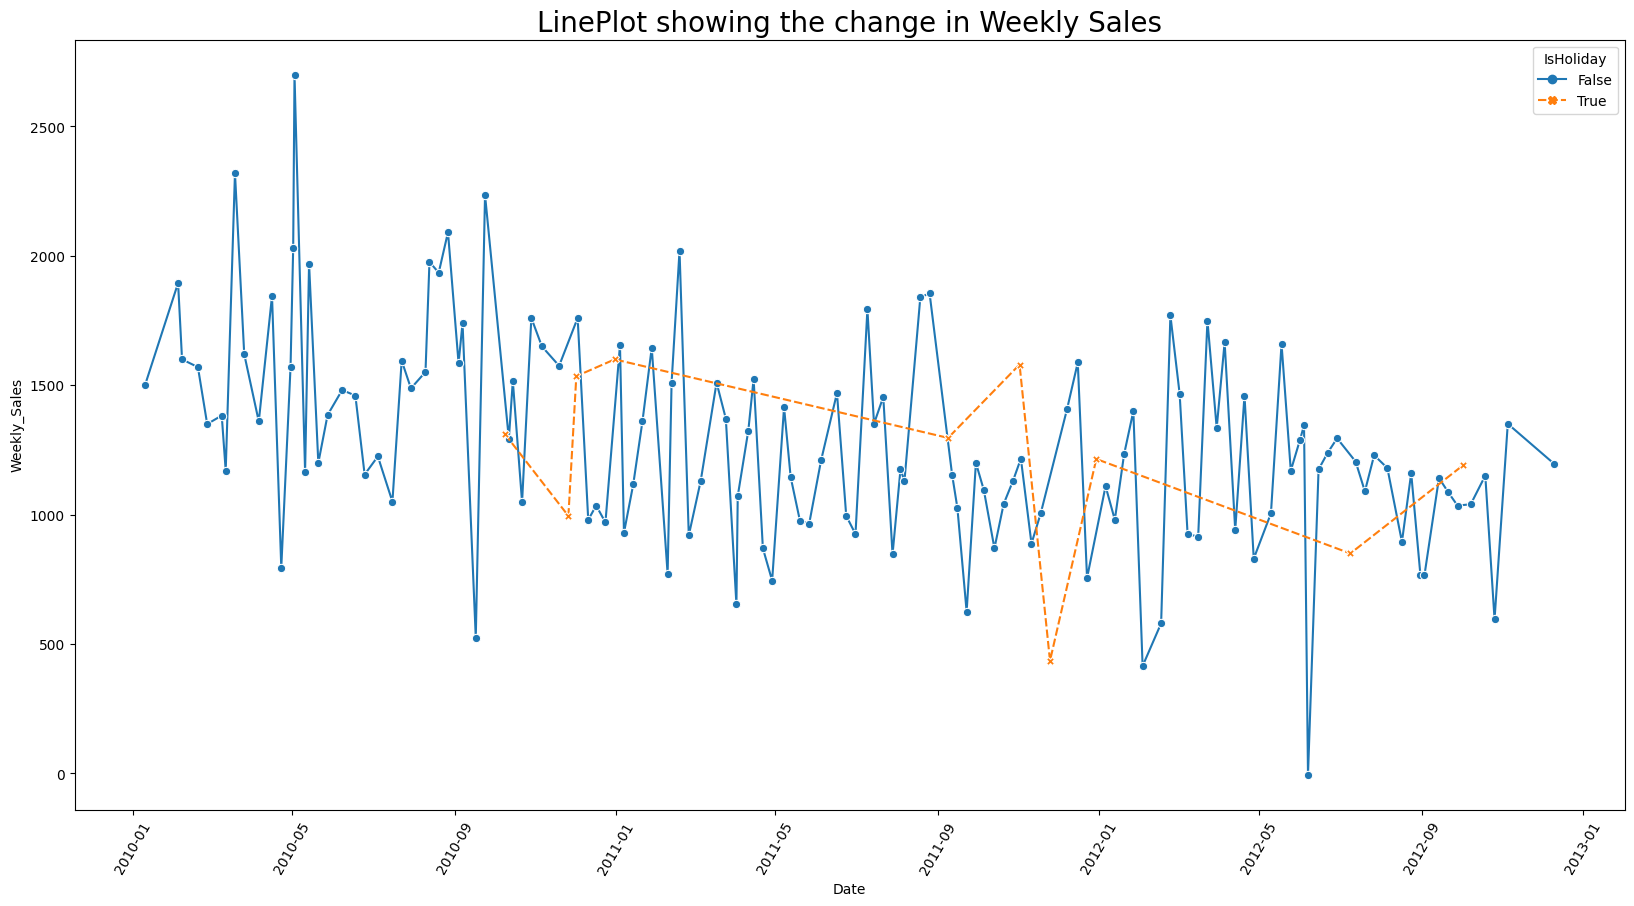

In [173]:
plt.figure
_ = plt.subplots(figsize = (20,10))
_ = plt.xticks(rotation = 60)
_ = sns.lineplot(data = df_d, x = 'Date',y = 'Weekly_Sales', hue = 'IsHoliday',style = 'IsHoliday', markers = True, ci = 68)
_ = plt.title('LinePlot showing the change in Weekly Sales', fontsize=20)
plt.show()

As we can see from the plot, there is no increase in sales on holidays.

## For forecast sales, let's create a separate time series that contains only weekly sales data

In [174]:
ts = df_d[['Date', 'Weekly_Sales']]
ts = ts.set_index('Date')
ts = ts['Weekly_Sales']
ts

Date
2010-05-02    2030.0
2010-12-02    1535.0
2010-02-19    1570.0
2010-02-26    1350.0
2010-05-03    2700.0
               ...  
2012-09-28    1035.0
2012-05-10    1005.0
2012-12-10    1196.5
2012-10-19    1151.0
2012-10-26     595.0
Name: Weekly_Sales, Length: 143, dtype: float64

**Whan we would like to make forecast of time series we can make only assumption that the data for today depend on the values of previous weeks. To check for dependencies, it is necessary to perform a correlation analysis between them. **
This requires:

duplicate the time series of data and move it vertically down for a certain number of days (lag)

delete the missing data at the beginning and end (they are formed by vertical shift (pandas.DataFrame.shift())

calculate the correlation coefficient between the obtained series
Since this operation must be performed for different values of the lag, it is convenient to create a separate function or use statsmodels.graphics.tsaplots.plot_acf().

Or better we can use Partial autocorrelation function: statsmodels.graphics.tsaplots.plot_pacf()

This analysis will allow us to determine the lag delay. That is, how many weeks ago sales affected sales today

0     1.000000
1     0.130103
2     0.263880
3     0.136014
4     0.311210
5     0.126184
6     0.245963
7     0.088694
8     0.253053
9     0.071838
10    0.154257
Name: Correlation Coeff, dtype: float64
0     1.000000
1     0.131019
2     0.254831
3     0.086411
4     0.254782
5     0.043069
6     0.131390
7    -0.013168
8     0.127694
9    -0.028223
10    0.000674
Name: Partial Correlation Coeff, dtype: float64


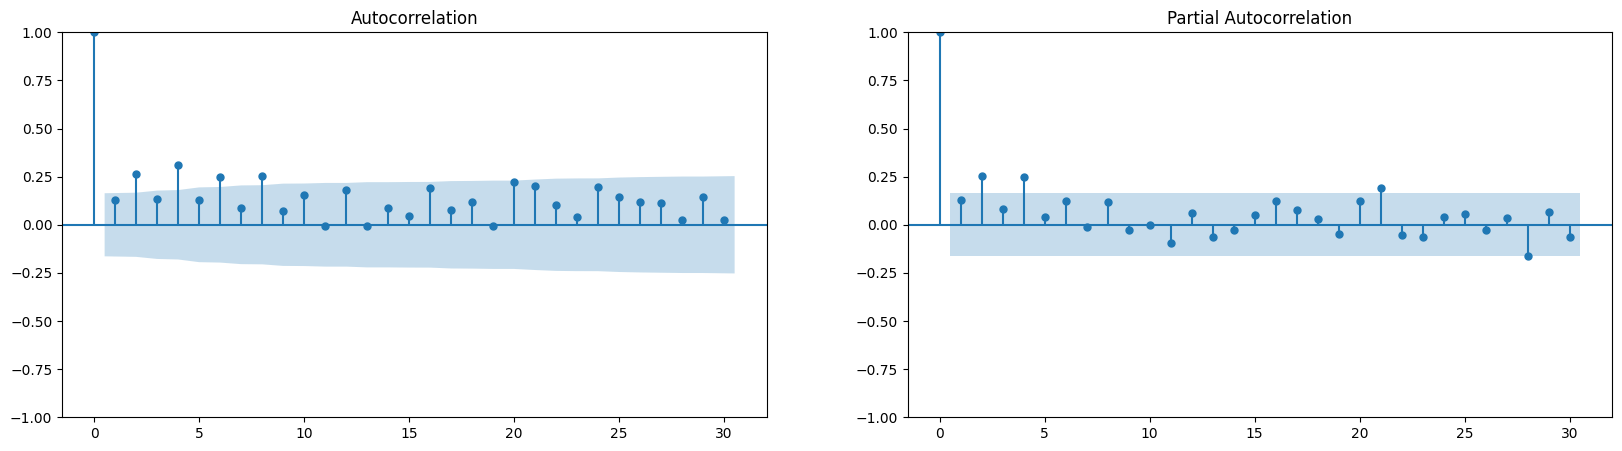

In [175]:
print(pd.Series(acf(ts,nlags=10), name = "Correlation Coeff"))
print(pd.Series(pacf(ts,nlags=10), name = "Partial Correlation Coeff"))


fig, axes = plt.subplots(1,2, figsize=(20,5))
_ = plot_acf(ts, lags=30, ax=axes[0])
_ = plot_pacf(ts, lags=30, ax=axes[1])

As we can be seen from the charts, we have to use sales for the previous 4 weeks as input parameters.

To automate this process, let's create a universal time series transformation function to a dataset structure.

In [176]:
def series_to_supervised(in_data, tar_data, n_in=1, dropnan=True, target_dep=False):
    """
    Transformation into a training sample taking into account the lag
     : param in_data: Input fields
     : param tar_data: Output field (single)
     : param n_in: Lag shift
     : param dropnan: Do destroy empty lines
     : param target_dep: Whether to take into account the lag of the input field If taken into account, the input will start with lag 1
     : return: Training sample. The last field is the source
    """

    n_vars = in_data.shape[1]
    cols, names = list(), list()

    if target_dep:
        i_start = 1
    else:
        i_start = 0
    for i in range(i_start, n_in + 1):
        cols.append(in_data.shift(i))
        names += [('%s(t-%d)' % (in_data.columns[j], i)) for j in range(n_vars)]

    if target_dep:
        for i in range(n_in, -1, -1):
            cols.append(tar_data.shift(i))
            names += [('%s(t-%d)' % (tar_data.name, i))]
    else:
        # put it all together
        cols.append(tar_data)
        names.append(tar_data.name)
    agg = pd.concat(cols, axis=1)
    agg.columns = names

    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)

    return agg

As mentioned above, the input and output fields when predicting time series are the same, only shifted by the lag. Let's create dataset:

In [177]:
dataset = series_to_supervised(pd.DataFrame(ts), ts, 4)
dataset

,Weekly_Sales(t-0),Weekly_Sales(t-1),Weekly_Sales(t-2),Weekly_Sales(t-3),Weekly_Sales(t-4),Weekly_Sales
Date,,,,,,
2010-05-03,2700.0,1350.0,1570.0,1535.0,2030.0,2700.0
2010-12-03,1760.0,2700.0,1350.0,1570.0,1535.0,1760.0
2010-03-19,2320.0,1760.0,2700.0,1350.0,1570.0,2320.0
2010-03-26,1620.0,2320.0,1760.0,2700.0,1350.0,1620.0
2010-02-04,1895.0,1620.0,2320.0,1760.0,2700.0,1895.0
...,...,...,...,...,...,...
2012-09-28,1035.0,1086.5,1141.5,850.0,765.0,1035.0
2012-05-10,1005.0,1035.0,1086.5,1141.5,850.0,1005.0
2012-12-10,1196.5,1005.0,1035.0,1086.5,1141.5,1196.5


As we can see, the first and last columns contain the same target data. Now we should create input (X) and output (Y) Datasets for forecasting models.

In [178]:
col = dataset.columns
X, y = dataset[col[1:-1]], dataset[col[-1]]
print("Input: ", X.columns)
print("Target:", y.name)

Input:  Index(['Weekly_Sales(t-1)', 'Weekly_Sales(t-2)', 'Weekly_Sales(t-3)',
       'Weekly_Sales(t-4)'],
      dtype='object')
Target: Weekly_Sales


In [179]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,  shuffle=False)

In [180]:
from sklearn.preprocessing import MinMaxScaler

In [181]:
# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## First of all we must create model. We will test three type of models.
1. Linear regression
2. Multilayer Neural Network


## Linear Regression

In [182]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [183]:
y_pred = regressor.predict(X_test)

In [184]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate correlations
correlation_train = np.corrcoef(y_train, regressor.predict(X_train))[0, 1]
correlation_test = np.corrcoef(y_test, y_pred)[0, 1]

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print(f"Correlation on Train Data: {correlation_train:.2f}")
print(f"Correlation on Test Data: {correlation_test:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")


Correlation on Train Data: 0.36
Correlation on Test Data: 0.16
Mean Absolute Error: 247.79
Mean Squared Error: 128125.03
Root Mean Squared Error: 357.95


As we can see, result correlation on test DataSet is very bad.

## Multilayer Neural Network


In [187]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [188]:
# Build the neural network model
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=X.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output layer with 1 neuron

In [189]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [191]:
# Train the model
batch_size=int(y_train.shape[0]*.1)
model.fit(X_train, y_train, epochs=500, batch_size=batch_size, verbose=1)

Epoch 1/500
11/11 [==============================] - 0s 10ms/step - loss: 154785.0938
Epoch 2/500
11/11 [==============================] - 0s 8ms/step - loss: 161970.5156
Epoch 3/500
11/11 [==============================] - 0s 7ms/step - loss: 172051.9219
Epoch 4/500
11/11 [==============================] - 0s 8ms/step - loss: 180124.7656
Epoch 5/500
11/11 [==============================] - 0s 6ms/step - loss: 198193.9219
Epoch 6/500
11/11 [==============================] - 0s 4ms/step - loss: 162853.3125
Epoch 7/500
11/11 [==============================] - 0s 5ms/step - loss: 151203.3125
Epoch 8/500
11/11 [==============================] - 0s 6ms/step - loss: 164312.3125
Epoch 9/500
11/11 [==============================] - 0s 7ms/step - loss: 166171.5625
Epoch 10/500
11/11 [==============================] - 0s 8ms/step - loss: 156495.0625
Epoch 11/500
11/11 [==============================] - 0s 6ms/step - loss: 155802.3594
Epoch 12/500
11/11 [==============================] - 0s 5ms/s

In [192]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print('Mean Squared Error:', loss)

2/2 [==============================] - 0s 6ms/step - loss: 125065.6406
Mean Squared Error: 125065.640625


In [193]:
# Make predictions
predictions = model.predict(X_test)

2/2 [==============================] - 0s 5ms/step


In [198]:
# Print sample predictions
for i in range(5):
    print('Actual:', y_test.values[i], 'Predicted:', predictions[i][0])

Actual: 980.0 Predicted: 1301.0901
Actual: 1233.0 Predicted: 1135.0645
Actual: 1400.0 Predicted: 1213.9026
Actual: 1466.5 Predicted: 1260.2048
Actual: 1190.0 Predicted: 1242.9633


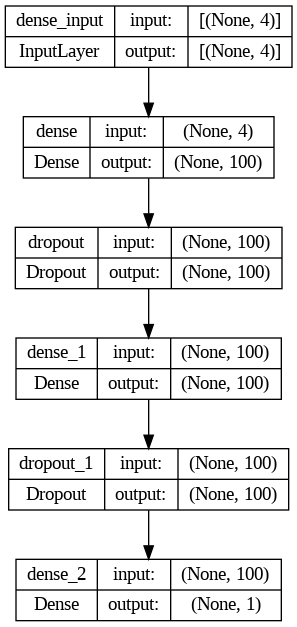

In [209]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [210]:
import pandas as pd

# Assuming X is a pandas DataFrame
# Assuming y_test and y_pred are numpy arrays
sample_count = 5

# Create a DataFrame to display the results
results_df = pd.DataFrame({'Actual': y_test[:sample_count], 'Predicted': y_pred[:sample_count]})

# Print the sample predictions along with the feature values
for i in range(sample_count):
    print(f'Sample {i+1}:')
    print('Actual:', results_df['Actual'].values[i])
    print('Predicted:', results_df['Predicted'].values[i])
    print('Features:')
    print(X.iloc[i])  # Display the feature values for this sample
    print('---')


Sample 1:
Actual: 980.0
Predicted: 1322.7625054351286
Features:
Weekly_Sales(t-1)    1350.0
Weekly_Sales(t-2)    1570.0
Weekly_Sales(t-3)    1535.0
Weekly_Sales(t-4)    2030.0
Name: 2010-05-03 00:00:00, dtype: float64
---
Sample 2:
Actual: 1233.0
Predicted: 1157.86932546005
Features:
Weekly_Sales(t-1)    2700.0
Weekly_Sales(t-2)    1350.0
Weekly_Sales(t-3)    1570.0
Weekly_Sales(t-4)    1535.0
Name: 2010-12-03 00:00:00, dtype: float64
---
Sample 3:
Actual: 1400.0
Predicted: 1233.293431202309
Features:
Weekly_Sales(t-1)    1760.0
Weekly_Sales(t-2)    2700.0
Weekly_Sales(t-3)    1350.0
Weekly_Sales(t-4)    1570.0
Name: 2010-03-19 00:00:00, dtype: float64
---
Sample 4:
Actual: 1466.5
Predicted: 1277.890339842402
Features:
Weekly_Sales(t-1)    2320.0
Weekly_Sales(t-2)    1760.0
Weekly_Sales(t-3)    2700.0
Weekly_Sales(t-4)    1350.0
Name: 2010-03-26 00:00:00, dtype: float64
---
Sample 5:
Actual: 1190.0
Predicted: 1255.1018495482278
Features:
Weekly_Sales(t-1)    1620.0
Weekly_Sales(t-2)   

[Text(0.175, 0, 'Sample 1'),
 Text(1.175, 0, 'Sample 2'),
 Text(2.175, 0, 'Sample 3'),
 Text(3.175, 0, 'Sample 4'),
 Text(4.175, 0, 'Sample 5')]

Text(0.5, 0, 'Sample')

Text(0, 0.5, 'Values')

Text(0.5, 1.0, 'Actual vs. Predicted Values with Features')

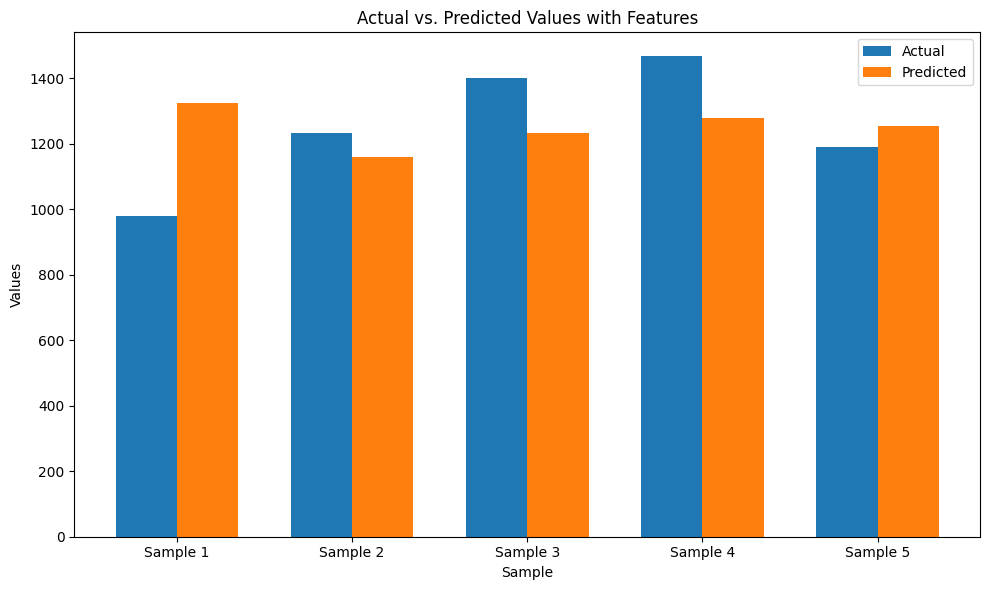

In [212]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
sample_count = 5
sample_indices = range(sample_count)
actual_values = results_df['Actual'].values[:sample_count]
predicted_values = results_df['Predicted'].values[:sample_count]

# Create a bar width for better spacing
bar_width = 0.35

# Set the positions of the bars on the x-axis
bar_positions = np.arange(sample_count)

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Create bars for actual and predicted values
actual_bars = ax.bar(bar_positions, actual_values, bar_width, label='Actual', align='center')
predicted_bars = ax.bar(bar_positions + bar_width, predicted_values, bar_width, label='Predicted', align='center')

# Set x-axis labels for each sample (assuming X is a DataFrame with appropriate labels)
sample_labels = [f'Sample {i + 1}' for i in sample_indices]
ax.set_xticks(bar_positions + bar_width / 2)
ax.set_xticklabels(sample_labels)

# Add labels and a legend
ax.set_xlabel('Sample')
ax.set_ylabel('Values')
ax.set_title('Actual vs. Predicted Values with Features')
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

